In [ ]:
# prompt: connect to drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
def create_data_generators(base_dir, img_size=(224, 224), batch_size=32):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )


In [ ]:
def create_data_generators(base_dir, img_size=(224, 224), batch_size=32):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    test_val_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        f'{base_dir}/train',
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical'
    )

    val_generator = test_val_datagen.flow_from_directory(
        f'{base_dir}/Valid',
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical'
    )

    test_generator = test_val_datagen.flow_from_directory(
        f'{base_dir}/test',
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )

    return train_generator, val_generator, test_generator

In [ ]:
# 2. CNN Model Architecture
def build_cnn_model(input_shape=(224, 224, 3), num_classes=4):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2,2)),

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),

        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D((2,2)),

        Conv2D(256, (3,3), activation='relu'),
        MaxPooling2D((2,2)),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

    return model


In [ ]:
def train_model(model, train_gen, val_gen, epochs=30):
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=epochs,
        callbacks=[
            tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
            tf.keras.callbacks.ModelCheckpoint('best_cnn_model.h5', save_best_only=True)
        ]
    )
    return history

In [ ]:
def predict_defect(model, image_path, class_names=['scratch', 'dent', 'spidol_mark']):
    img = Image.open(image_path).convert('RGB')
    img = img.resize((224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    predictions = model.predict(img_array)
    scores = predictions[0]

    # Format results exactly as requested
    formatted_results = {
        'Scratch': float(scores[0]),
        'Dent': float(scores[1]),
        'Spidol Mark': float(scores[2])
    }

    top_class_idx = np.argmax(scores)
    top_class = class_names[top_class_idx].replace('_', ' ').title()
    top_confidence = float(scores[top_class_idx])

    return formatted_results, top_class, top_confidence


In [ ]:
if __name__ == "__main__":
    # 1. Prepare data
    BASE_DIR = "/content/drive/MyDrive/Manufacturing defects/sorted_defects"
    train_gen, val_gen, test_gen = create_data_generators(BASE_DIR)

    # 2. Build and train model
    cnn_model = build_cnn_model()
    history = train_model(cnn_model, train_gen, val_gen)

    # 3. Save final model
    cnn_model.save('defect_classifier_cnn.h5')



Found 43 images belonging to 4 classes.
Found 43 images belonging to 4 classes.
Found 43 images belonging to 4 classes.
Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1515 - loss: 1.5185

2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.1708 - loss: 1.5398 - val_accuracy: 0.3023 - val_loss: 1.5346
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.2643 - loss: 1.5805

2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 8s/step - accuracy: 0.2615 - loss: 1.5299 - val_accuracy: 0.5581 - val_loss: 1.2688
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5487 - loss: 1.2761

2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 5s/step - accuracy: 0.5441 - loss: 1.2770 - val_accuracy: 0.5581 - val_loss: 1.0566
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5603 - loss: 1.0317

2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - accuracy: 0.5596 - loss: 1.0464 - val_accuracy: 0.5581 - val_loss: 1.0286
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 7s/step - accuracy: 0.3841 - loss: 1.1476 - val_accuracy: 0.6512 - val_loss: 1.0478
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4725 - loss: 1.0686

2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 7s/step - accuracy: 0.5088 - loss: 1.0630 - val_accuracy: 0.6512 - val_loss: 1.0195
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5603 - loss: 1.0227

2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.5596 - loss: 1.0319 - val_accuracy: 0.6744 - val_loss: 0.9727
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5518 - loss: 1.0234

2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 8s/step - accuracy: 0.5539 - loss: 1.0247 - val_accuracy: 0.6744 - val_loss: 0.9199
Epoch 9/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7008 - loss: 1.0068

2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 6s/step - accuracy: 0.6920 - loss: 0.9927 - val_accuracy: 0.6744 - val_loss: 0.8726
Epoch 10/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7008 - loss: 0.8290

2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 6s/step - accuracy: 0.6920 - loss: 0.8613 - val_accuracy: 0.6977 - val_loss: 0.8597
Epoch 11/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.5518 - loss: 0.9821

2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 9s/step - accuracy: 0.5539 - loss: 1.0210 - val_accuracy: 0.6744 - val_loss: 0.8431
Epoch 12/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5645 - loss: 0.9743

2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 6s/step - accuracy: 0.6011 - loss: 0.9418 - val_accuracy: 0.6744 - val_loss: 0.8374
Epoch 13/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7238 - loss: 0.8580

2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step - accuracy: 0.7151 - loss: 0.8621 - val_accuracy: 0.7209 - val_loss: 0.7999
Epoch 14/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 7s/step - accuracy: 0.7378 - loss: 0.7658 - val_accuracy: 0.6977 - val_loss: 0.8287
Epoch 15/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6537 - loss: 0.8616

2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - accuracy: 0.6529 - loss: 0.8675 - val_accuracy: 0.7209 - val_loss: 0.7993
Epoch 16/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.6943 - loss: 0.8502 - val_accuracy: 0.7209 - val_loss: 0.8062
Epoch 17/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7579 - loss: 0.7832

2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 12s/step - accuracy: 0.7378 - loss: 0.8196 - val_accuracy: 0.6977 - val_loss: 0.7727
Epoch 18/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6537 - loss: 0.9010

2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.6529 - loss: 0.9018 - val_accuracy: 0.7209 - val_loss: 0.7118
Epoch 19/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 6s/step - accuracy: 0.6772 - loss: 0.7991 - val_accuracy: 0.7209 - val_loss: 0.7706
Epoch 20/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7471 - loss: 0.7306

2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - accuracy: 0.7461 - loss: 0.7422 - val_accuracy: 0.7442 - val_loss: 0.7007
Epoch 21/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 7s/step - accuracy: 0.7385 - loss: 0.7715 - val_accuracy: 0.7209 - val_loss: 0.7380
Epoch 22/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6670 - loss: 0.8681

2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 10s/step - accuracy: 0.6772 - loss: 0.8371 - val_accuracy: 0.7442 - val_loss: 0.6817
Epoch 23/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - accuracy: 0.6684 - loss: 0.7843 - val_accuracy: 0.7209 - val_loss: 0.7931
Epoch 24/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.7378 - loss: 0.7473 - val_accuracy: 0.7209 - val_loss: 0.7233
Epoch 25/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - accuracy: 0.6943 - loss: 0.7571 - val_accuracy: 0.7442 - val_loss: 0.6938
Epoch 26/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 5s/step - accuracy: 0.6772 - loss: 0.7893 - val_accuracy: 0.7209 - val_loss: 0.7149
Epoch 27/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.7357 - loss: 0.6779 - val_accuracy: 0.7209 - val_loss: 0.7440


In [ ]:
# 4. Example prediction (using a test image)
test_image_path = f"{BASE_DIR}/test/scratch/IMG_20230617_003840_jpg.rf.cd7ffd72179eebe10deec5086420cca9.jpg_defect_1.jpg"  # Replace with your image
scores, top_class, top_conf = predict_defect(cnn_model, test_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


In [ ]:
print("Defect Classification Results:")
for defect_type, confidence in scores.items():
        print(f"{defect_type} → {confidence:.2f}")

print(f"\nTop prediction: {top_class} with confidence {top_conf:.2f}")

Defect Classification Results:
Scratch → 0.11
Dent → 0.21
Spidol Mark → 0.64

Top prediction: Spidol Mark with confidence 0.64


In [ ]:

image_path = "/content/drive/MyDrive/Manufacturing defects/sorted_defects/test/scratch/IMG_20230617_003840_jpg.rf.cd7ffd72179eebe10deec5086420cca9.jpg_defect_1.jpg"  # Replace with your image


model = tf.keras.models.load_model('defect_classifier_cnn.h5')
scores, top_class, _ = predict_defect(model, image_path)
print(f"{top_class} defect detected with confidence {max(scores.values()):.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Spidol Mark defect detected with confidence 0.64



Model Performance Visualization:
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 532ms/step


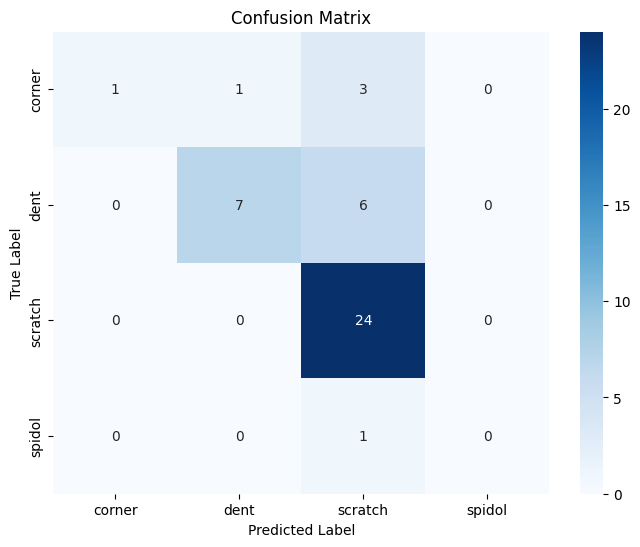

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 329ms/step


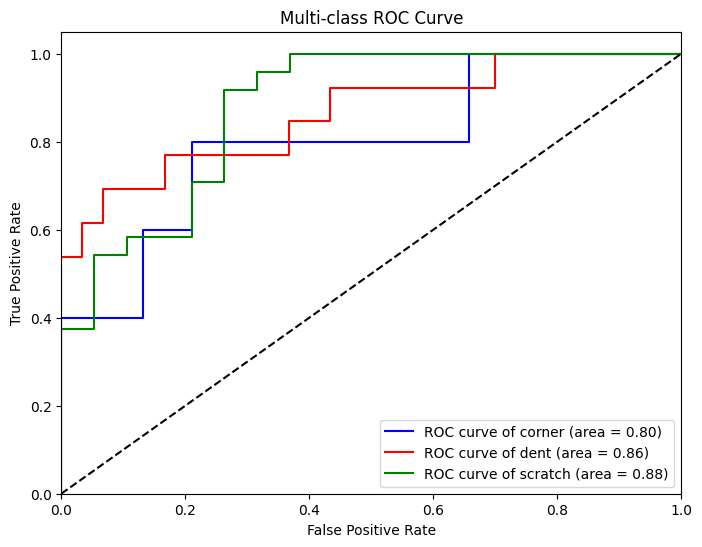

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 336ms/step

Classification Report:
              precision    recall  f1-score   support

      corner       1.00      0.20      0.33         5
        dent       0.88      0.54      0.67        13
     scratch       0.71      1.00      0.83        24
      spidol       0.00      0.00      0.00         1

    accuracy                           0.74        43
   macro avg       0.65      0.43      0.46        43
weighted avg       0.77      0.74      0.70        43



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(model, test_gen):

    y_true = test_gen.classes
    y_pred = model.predict(test_gen)
    y_pred_classes = np.argmax(y_pred, axis=1)

    cm = confusion_matrix(y_true, y_pred_classes)
    class_names = list(test_gen.class_indices.keys())

    # Plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def plot_roc_curve(model, test_gen):

    y_true = label_binarize(test_gen.classes, classes=[0, 1, 2])
    y_pred = model.predict(test_gen)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):  # For each class
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'red', 'green']
    class_names = list(test_gen.class_indices.keys())

    for i, color in zip(range(3), colors):
        plt.plot(fpr[i], tpr[i], color=color,
                 label='ROC curve of {0} (area = {1:0.2f})'
                 ''.format(class_names[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-class ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# 6. Visualize Model Performance
print("\nModel Performance Visualization:")
plot_confusion_matrix(cnn_model, test_gen)
plot_roc_curve(cnn_model, test_gen)

# 7. Additional Metrics Report
from sklearn.metrics import classification_report

# Get classification report
y_true = test_gen.classes
y_pred = cnn_model.predict(test_gen)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes,
                           target_names=list(test_gen.class_indices.keys())))